Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Data Collection and Processing

# **Train DataSet**

In [ ]:
# loading the Train dataset to pandas DataFrame
flight_train_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Flight Price Prediction/Data_Train.xlsx")

In [ ]:
type(flight_train_data)

pandas.core.frame.DataFrame

In [ ]:
# first 5 rows of the dataframe
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# last 5 rows of the dataframe
flight_train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
# number of rows and columns
flight_train_data.shape

(10683, 11)

In [ ]:
# the name of the columns of dataset
flight_train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Describe the data
flight_train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# getting imformation about dataset
flight_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# number of missing values in each column
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# drop null value
flight_train_data.dropna(inplace=True)

In [ ]:
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA

In [ ]:
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# converting string date into int number date from Date_of_Journey

flight_train_data["Journey_day"] = pd.to_datetime(flight_train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

flight_train_data["Journey_month"] = pd.to_datetime(flight_train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

# flight_train_data["Journey_year"] = pd.to_datetime(flight_train_data["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [ ]:
flight_train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [ ]:
# converting string time into int number time from Dep_Time

flight_train_data["Dep_hour"] = pd.to_datetime(flight_train_data["Dep_Time"]).dt.hour

flight_train_data["Dep_minute"] = pd.to_datetime(flight_train_data["Dep_Time"]).dt.minute

In [ ]:
flight_train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [ ]:
# converting string time into int number time from Arrival_Time

flight_train_data["Arrival_hour"] = pd.to_datetime(flight_train_data["Arrival_Time"]).dt.hour

flight_train_data["Arrival_minute"] = pd.to_datetime(flight_train_data["Arrival_Time"]).dt.minute

# Drop Arrival_Time column
flight_train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [ ]:
# converting string time into int number time from Duration

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(flight_train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe

flight_train_data["Duration_hours"] = duration_hours
flight_train_data["Duration_mins"] = duration_mins

In [ ]:
# Drop Duration column
flight_train_data.drop(["Duration"], axis=1, inplace=True)

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

**Airline**

In [ ]:
flight_train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

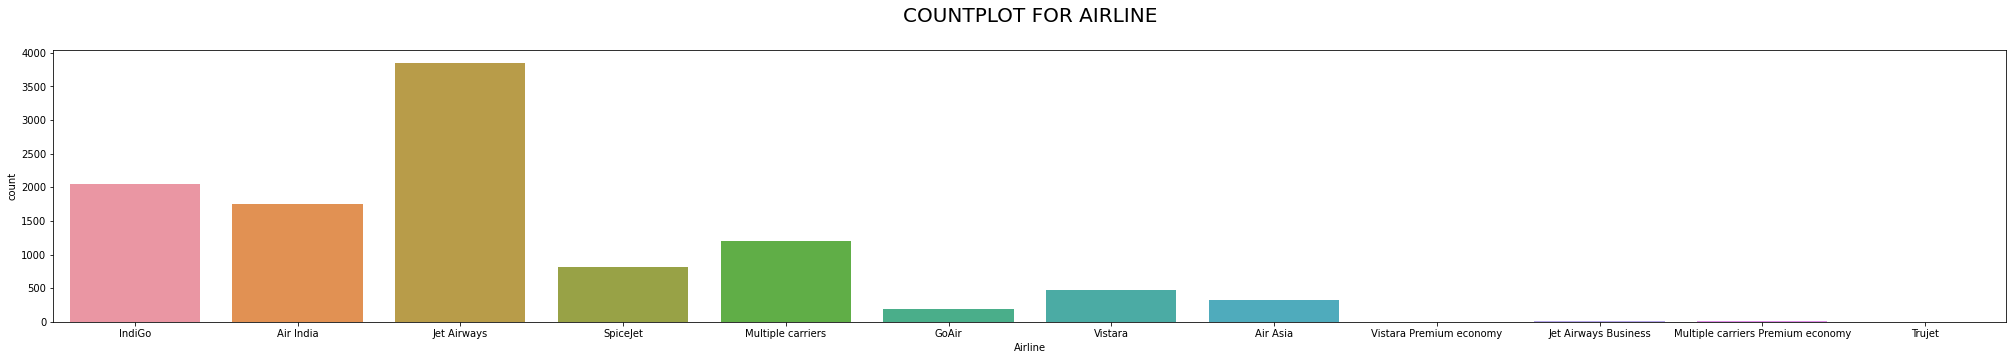

In [ ]:
# Airline Countplot
plt.figure(figsize=(35,5))
sns.countplot(x='Airline', data=flight_train_data)
title = 'CountPlot for Airline\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

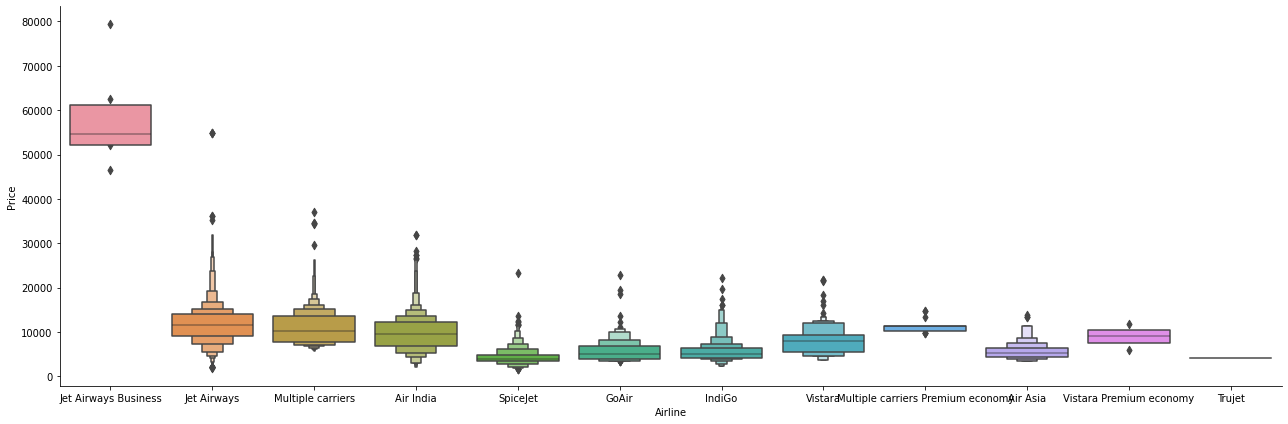

In [ ]:
# Cat Plot
sns.catplot(x = "Airline", y = "Price", data = flight_train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = flight_train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
print("Number of Airline :", len(flight_train_data["Airline"].unique()))

Number of Airline : 12


In [ ]:
flight_train_data["Airline"].replace({"Jet Airways": 0, "IndiGo": 1, "Air India": 2, "Multiple carriers": 3, "SpiceJet": 4,
                           "Vistara": 5, "Air Asia": 6, "GoAir": 7, "Multiple carriers Premium economy": 8,
                           "Jet Airways Business": 9, "Vistara Premium economy": 10, "Trujet": 11,}, inplace = True)

In [ ]:
flight_train_data["Airline"].value_counts()

0     3849
1     2053
2     1751
3     1196
4      818
5      479
6      319
7      194
8       13
9        6
10       3
11       1
Name: Airline, dtype: int64

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


**Source**

In [ ]:
flight_train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

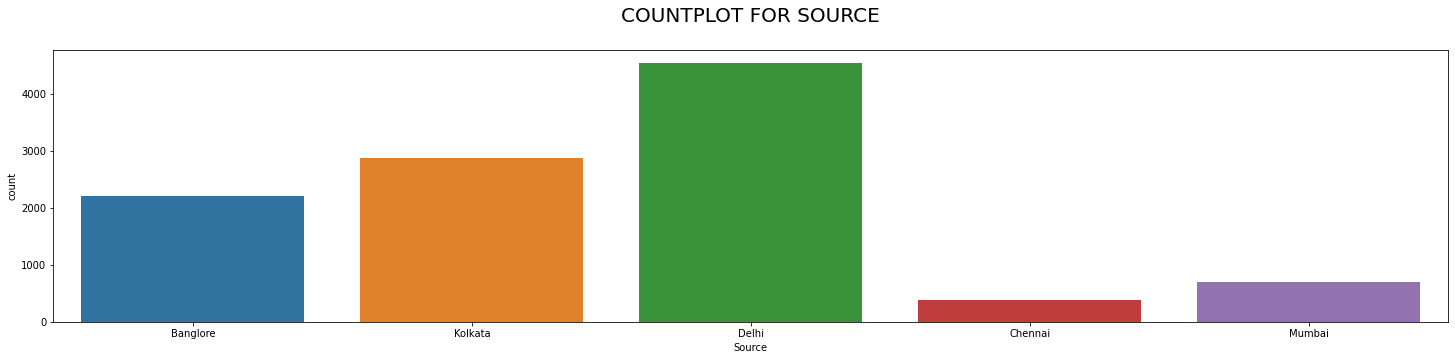

In [ ]:
# Source Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Source', data=flight_train_data)
title = 'CountPlot for Source\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

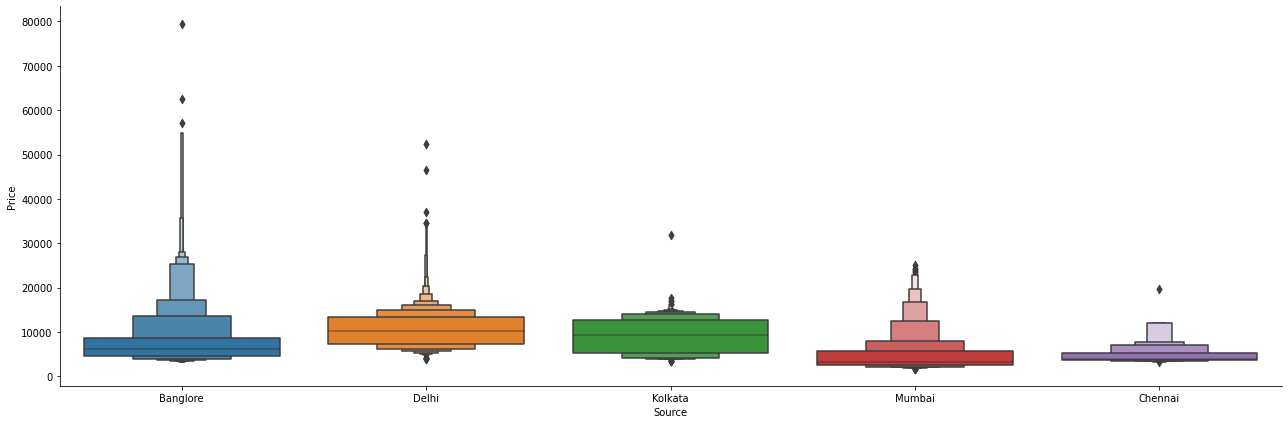

In [ ]:
# Cat Plot
sns.catplot(x = "Source", y = "Price", data = flight_train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = flight_train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
print("Number of Source :", len(flight_train_data["Source"].unique()))

Number of Source : 5


In [ ]:
flight_train_data["Source"].replace({"Delhi": 0, "Kolkata": 1, "Banglore": 2, "Mumbai": 3, "Chennai": 4,}, inplace = True)

In [ ]:
flight_train_data["Source"].value_counts()

0    4536
1    2871
2    2197
3     697
4     381
Name: Source, dtype: int64

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,2,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


**Destination**

In [ ]:
flight_train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

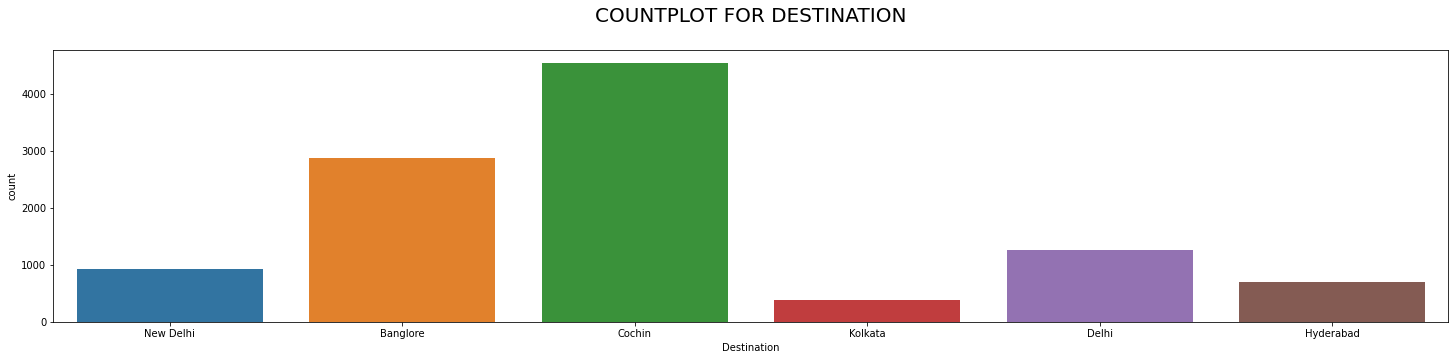

In [ ]:
# Destination Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Destination', data=flight_train_data)
title = 'CountPlot for Destination\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

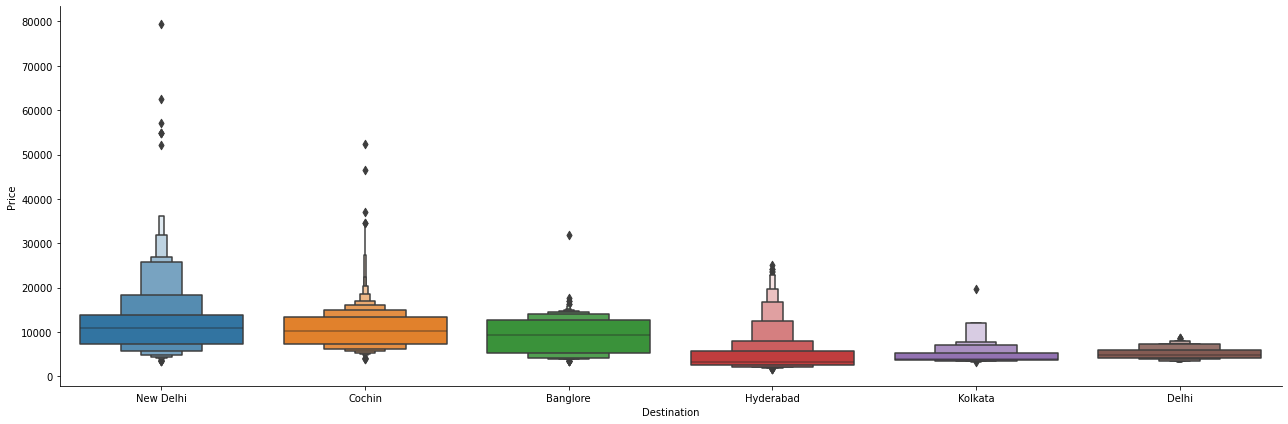

In [ ]:
# Cat Plot
sns.catplot(x = "Destination", y = "Price", data = flight_train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = flight_train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
print("Number of Destination :", len(flight_train_data["Destination"].unique()))

Number of Destination : 6


In [ ]:
flight_train_data["Destination"].replace({"Cochin": 0, "Banglore": 1, "Delhi": 2, "New Delhi": 3, "Hyderabad": 4,
                           "Kolkata": 5,}, inplace = True)

In [ ]:
flight_train_data["Destination"].value_counts()

0    4536
1    2871
2    1265
3     932
4     697
5     381
Name: Destination, dtype: int64

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,2,3,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


**Total_Stops**

In [ ]:
flight_train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

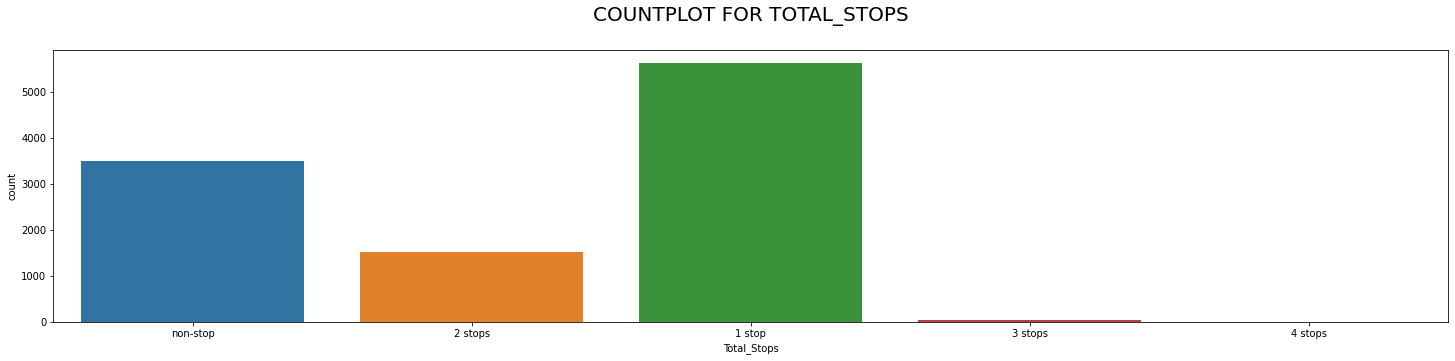

In [ ]:
# Total_Stops Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Total_Stops', data=flight_train_data)
title = 'CountPlot for Total_Stops\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

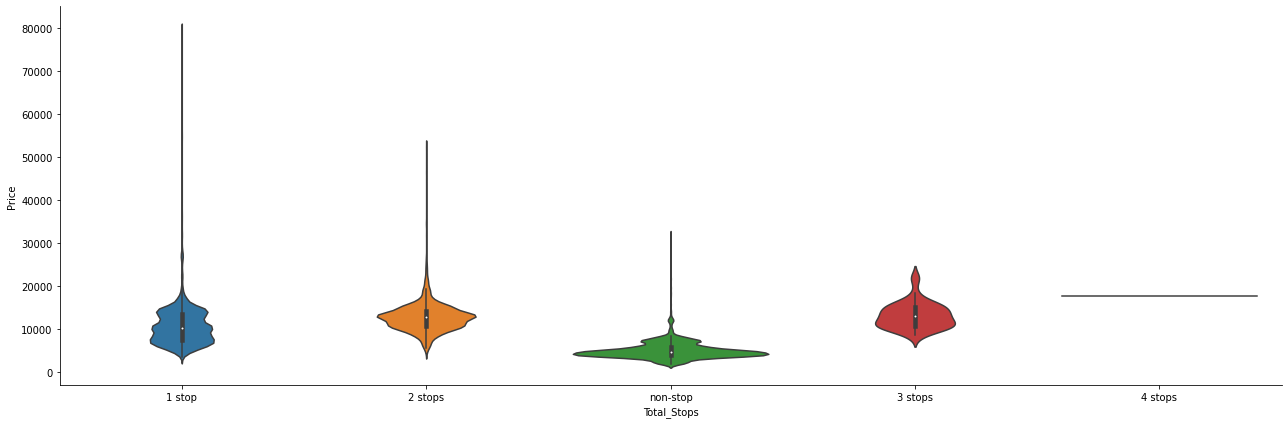

In [ ]:
# Cat Plot
sns.catplot(x = "Total_Stops", y = "Price", data = flight_train_data.sort_values("Price", ascending = False), kind="violin", height = 6, aspect = 3)
plt.show()

In [ ]:
# As Total_Stops is Nominal Categorical data we will perform OneHotEncoding

Total_Stops = flight_train_data[["Total_Stops"]]

Total_Stops = pd.get_dummies(Total_Stops, drop_first= True)

Total_Stops.head()

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
print("Number of Total_Stops :", len(flight_train_data["Total_Stops"].unique()))

Number of Total_Stops : 5


In [ ]:
flight_train_data["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,}, inplace = True)

In [ ]:
flight_train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,2,3,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
# After perform Categorical data to int data using one hot encoding then we have to perform Concatenate
# Here use replace() method, for better we can use concatenate
# Concatenate dataframe --> flight_train_data + Airline + Source + Destination

# data_train = pd.concat([flight_train_data, Airline, Source, Destination], axis = 1)

In [ ]:
flight_train_data.drop(["Route" , "Additional_Info"], axis=1, inplace=True )

In [ ]:
flight_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,2,3,0,3897,24,3,22,20,1,10,2,50
1,2,1,1,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,1,1,1,1,6218,12,5,18,5,23,30,5,25
4,1,2,3,1,13302,1,3,16,50,21,35,4,45


In [ ]:
flight_train_data.shape

(10682, 13)

**Train Data Visualization**

Pairplot for Flight Price Prediction Dataset


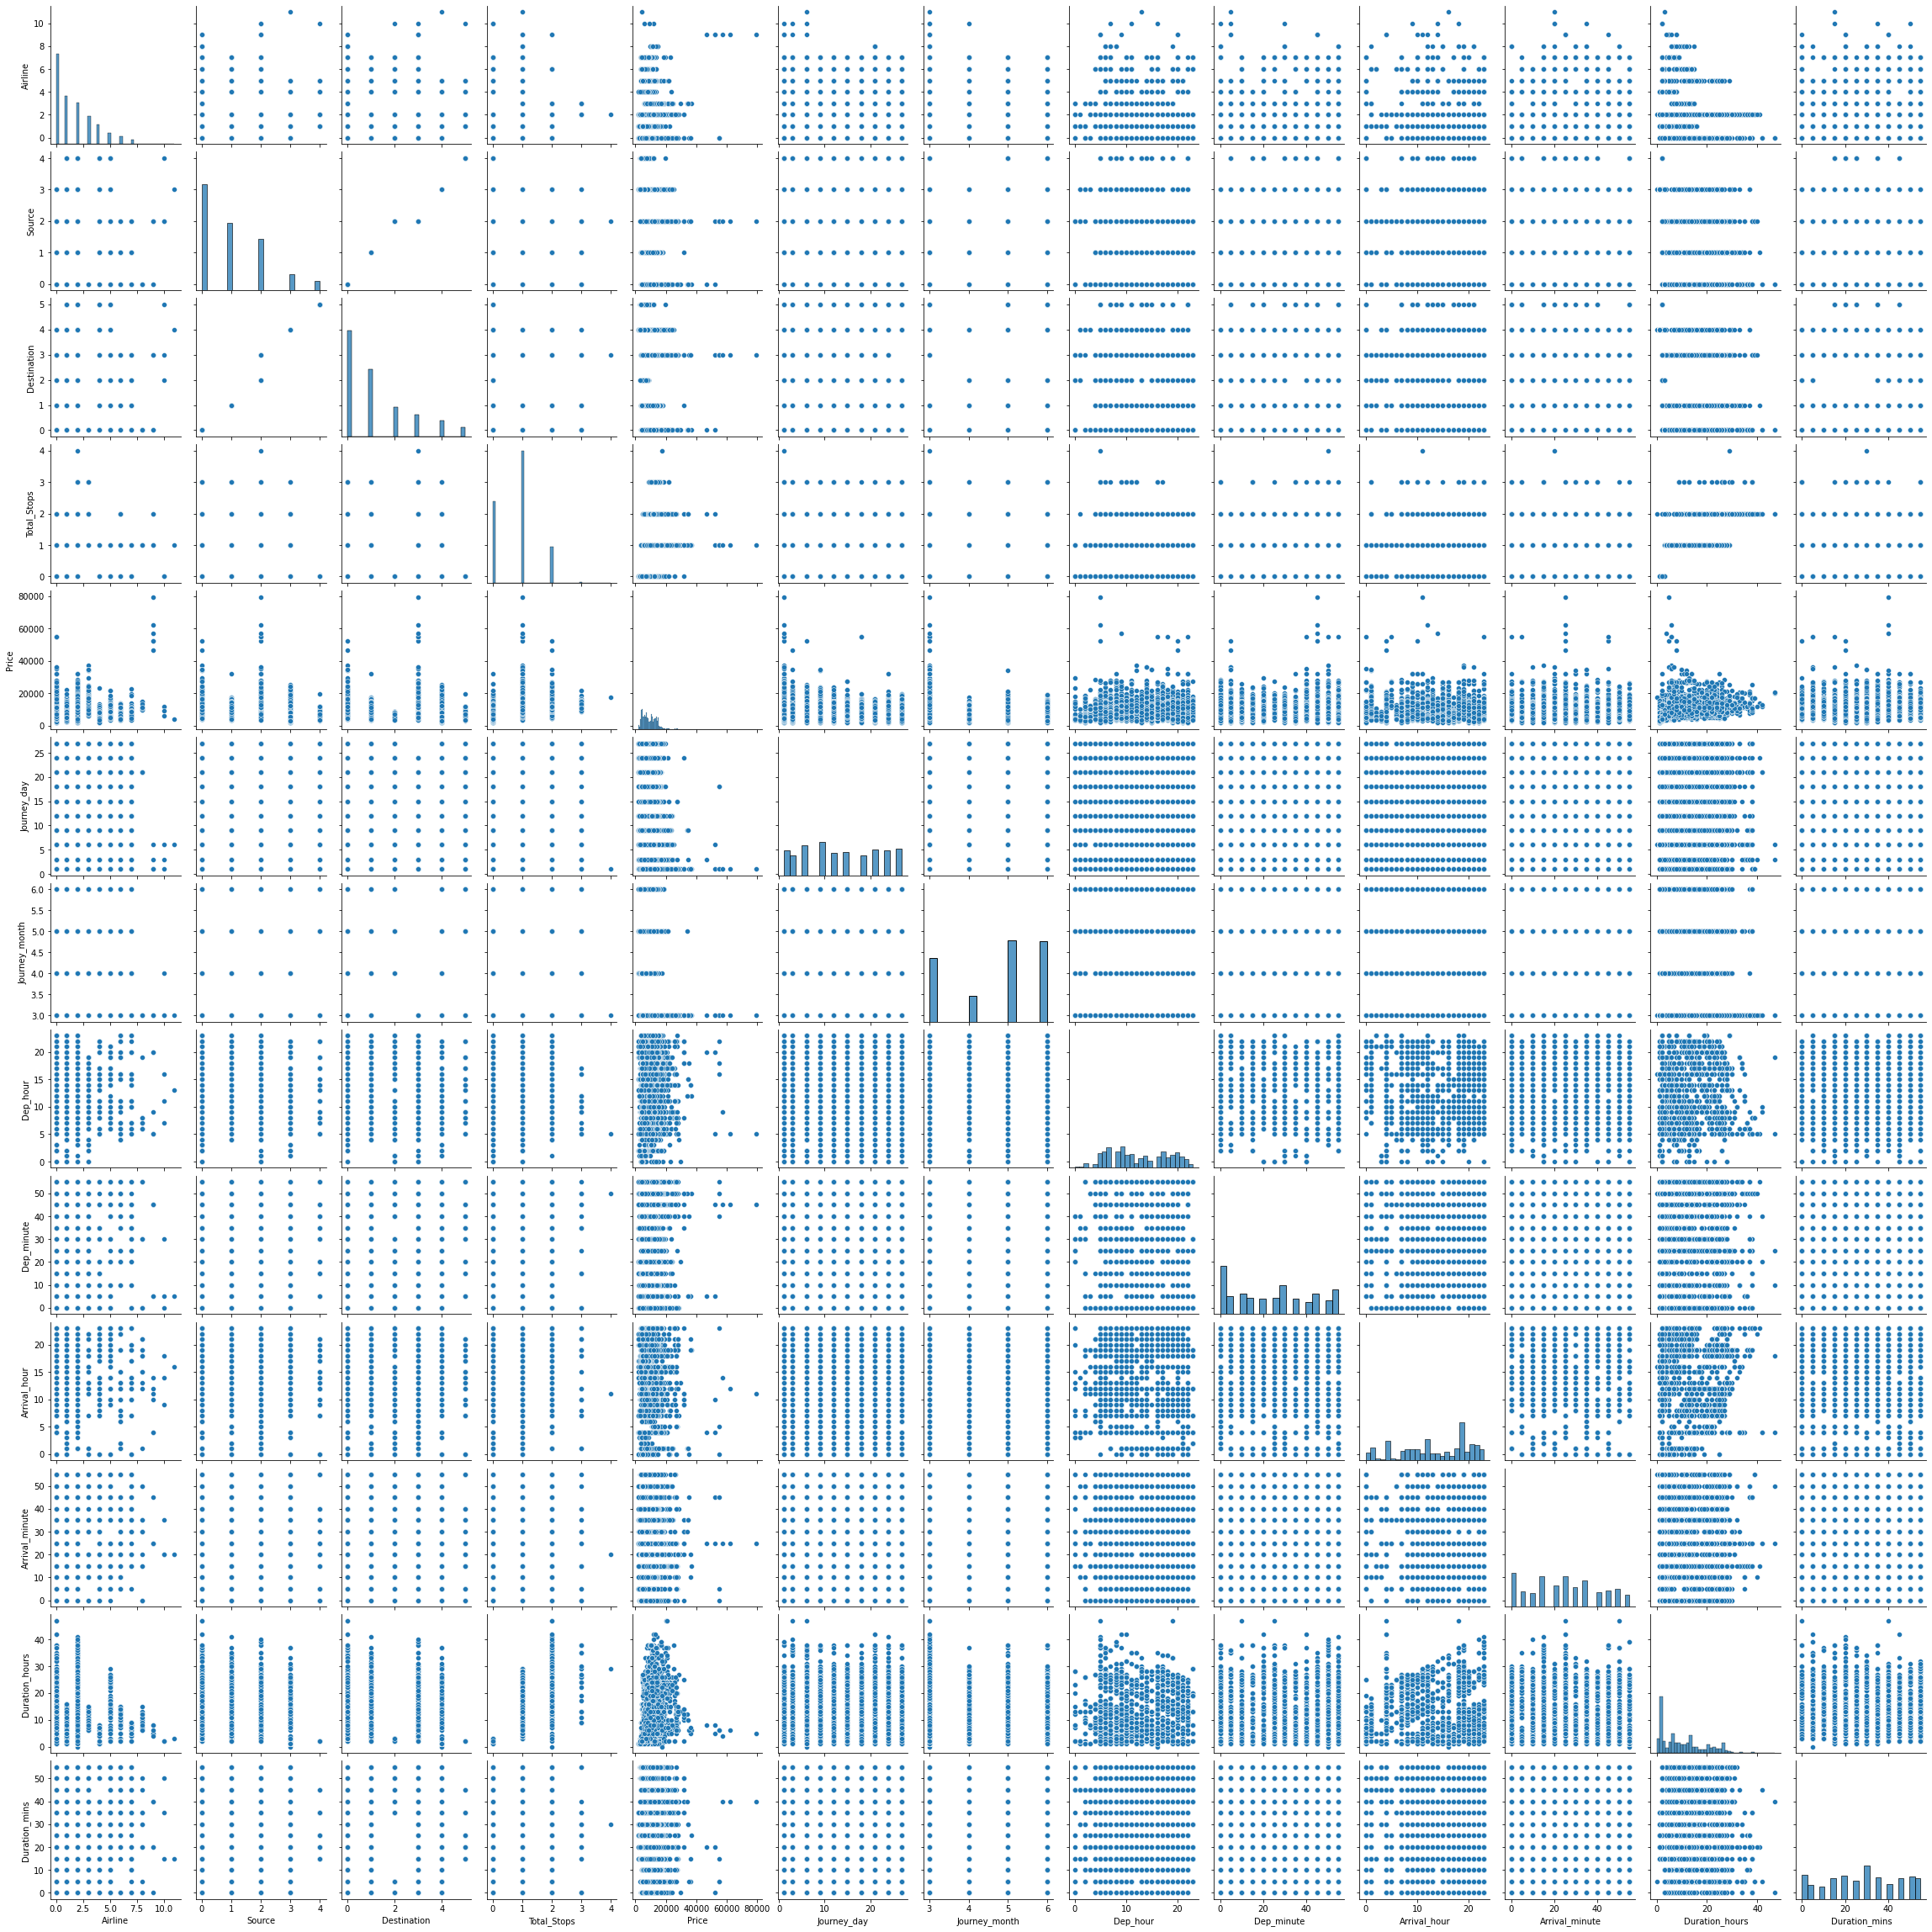

In [ ]:
# pairplot for Flight Price Prediction Dataset
sns.pairplot(flight_train_data)
print('Pairplot for Flight Price Prediction Dataset')

Pairplot for Flight Price Prediction Dataset


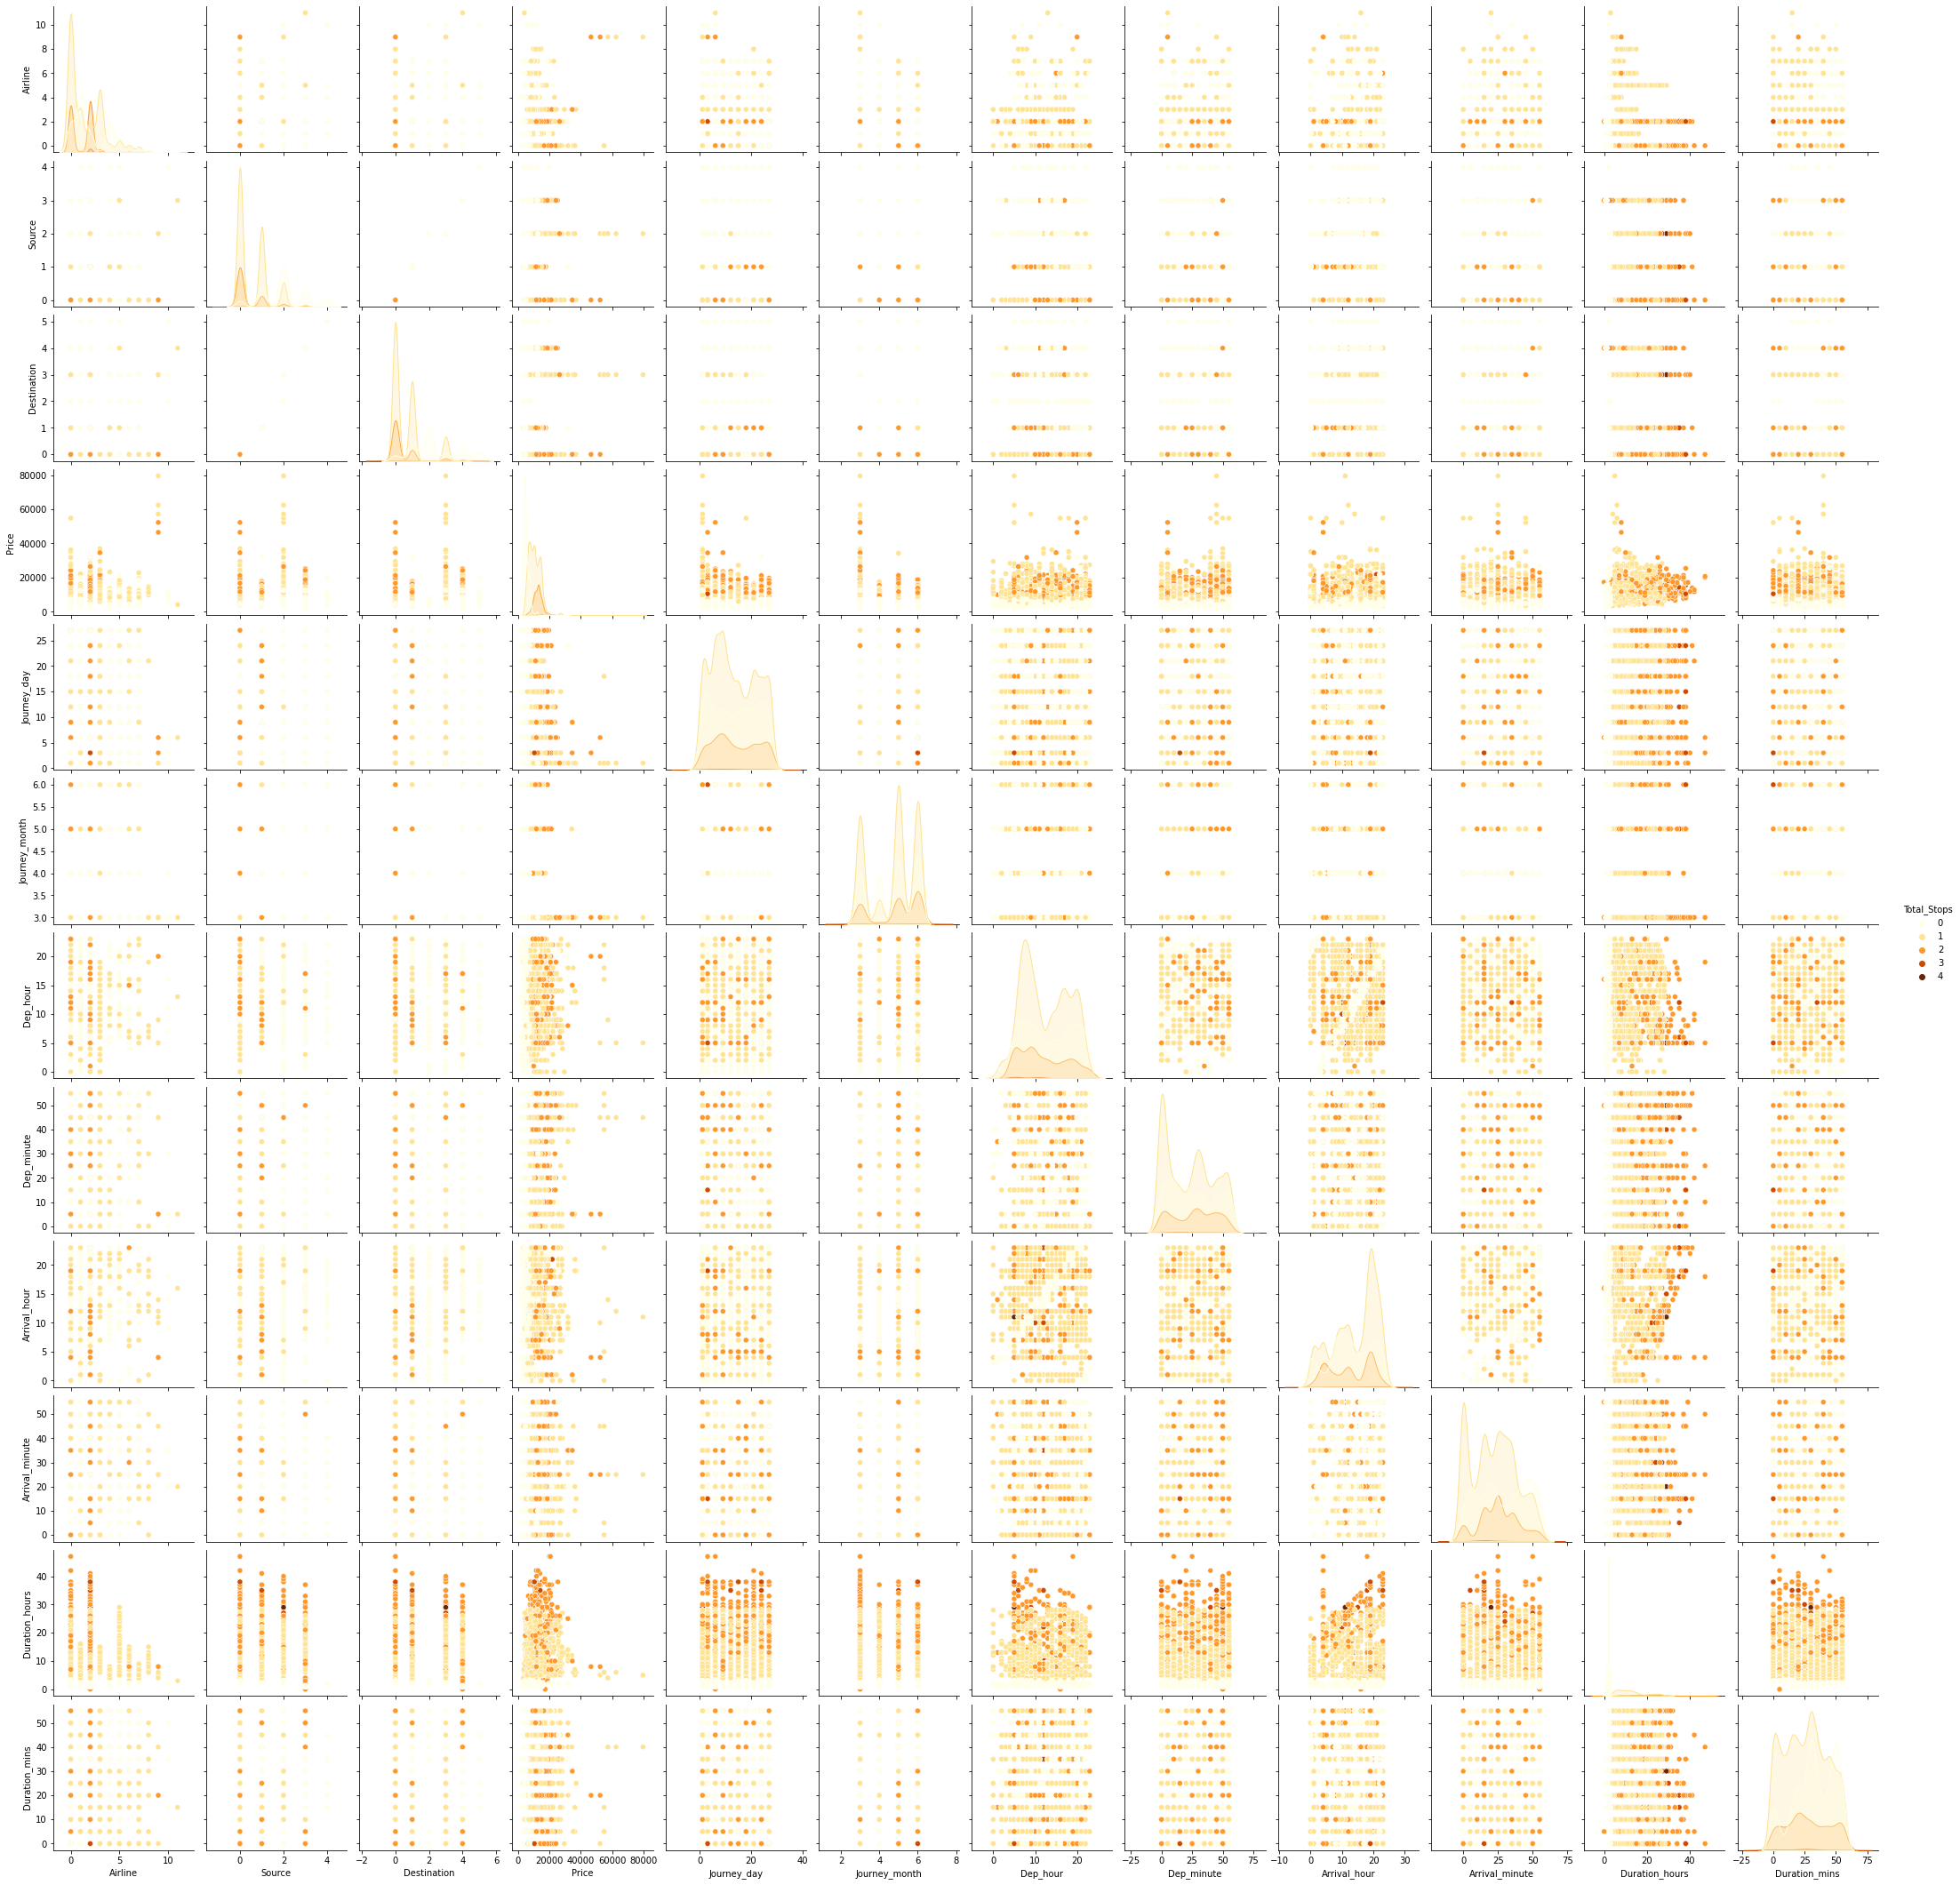

In [ ]:
# pairplot for Flight Price Prediction Dataset
sns.pairplot(flight_train_data, hue='Total_Stops',palette="YlOrBr")
print('Pairplot for Flight Price Prediction Dataset')

Histplot in Flight Price Prediction Dataset


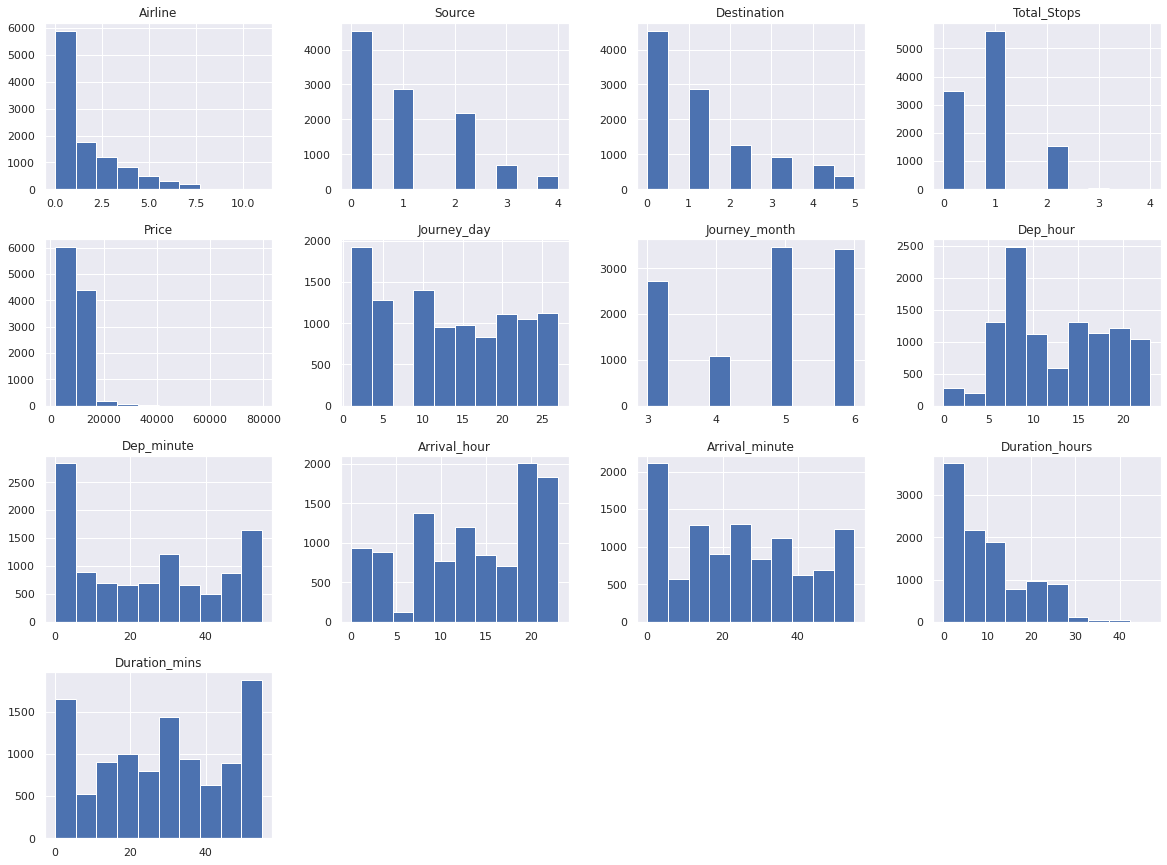

In [ ]:
sns.set(style="darkgrid") # hide graph line
flight_train_data.hist(figsize=(20,15))
print('Histplot in Flight Price Prediction Dataset')
plt.show()

In [ ]:
flight_train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_mins'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


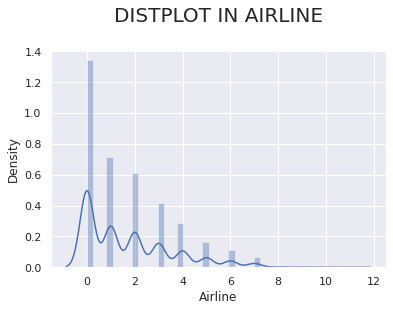

In [ ]:
# Airline
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Airline'])
title = 'Distplot in Airline\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


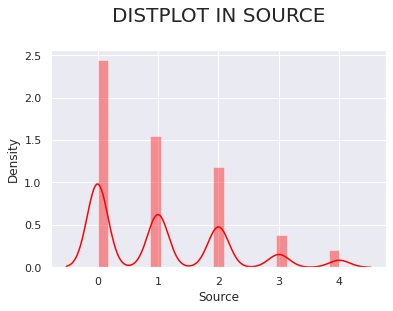

In [ ]:
# Source
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Source'], color='red')
title = 'Distplot in Source\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


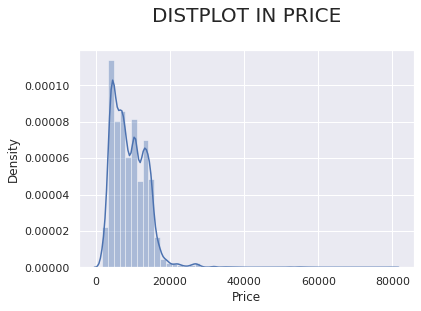

In [ ]:
# Price
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Price'])
title = 'Distplot in Price\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


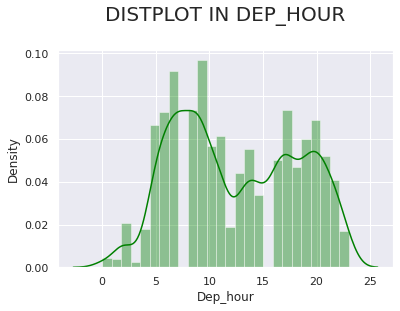

In [ ]:
# Dep_hour
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Dep_hour'], color='green')
title = 'Distplot in Dep_hour\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


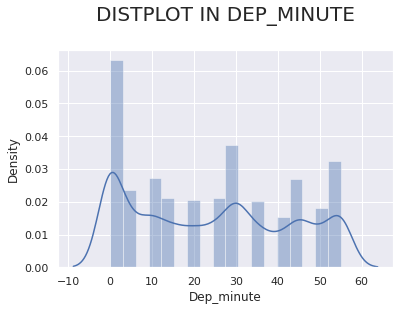

In [ ]:
# Dep_minute
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Dep_minute'])
title = 'Distplot in Dep_minute\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


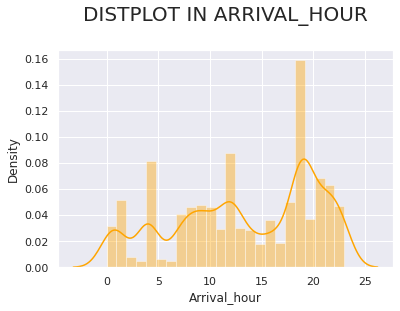

In [ ]:
# Arrival_hour
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Arrival_hour'], color='orange')
title = 'Distplot in Arrival_hour\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


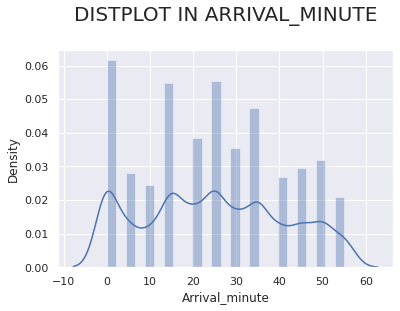

In [ ]:
# Arrival_minute
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Arrival_minute'])
title = 'Distplot in Arrival_minute\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


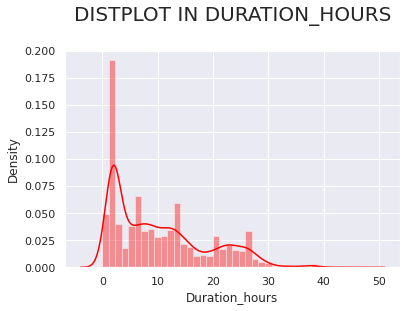

In [ ]:
# Duration_hours
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Duration_hours'], color='red')
title = 'Distplot in Duration_hours\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


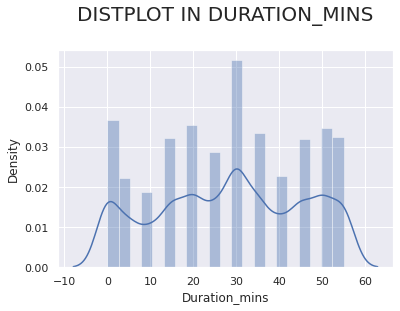

In [ ]:
# Duration_mins
plt.figure(figsize=(6,4))
sns.distplot(flight_train_data['Duration_mins'])
title = 'Distplot in Duration_mins\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

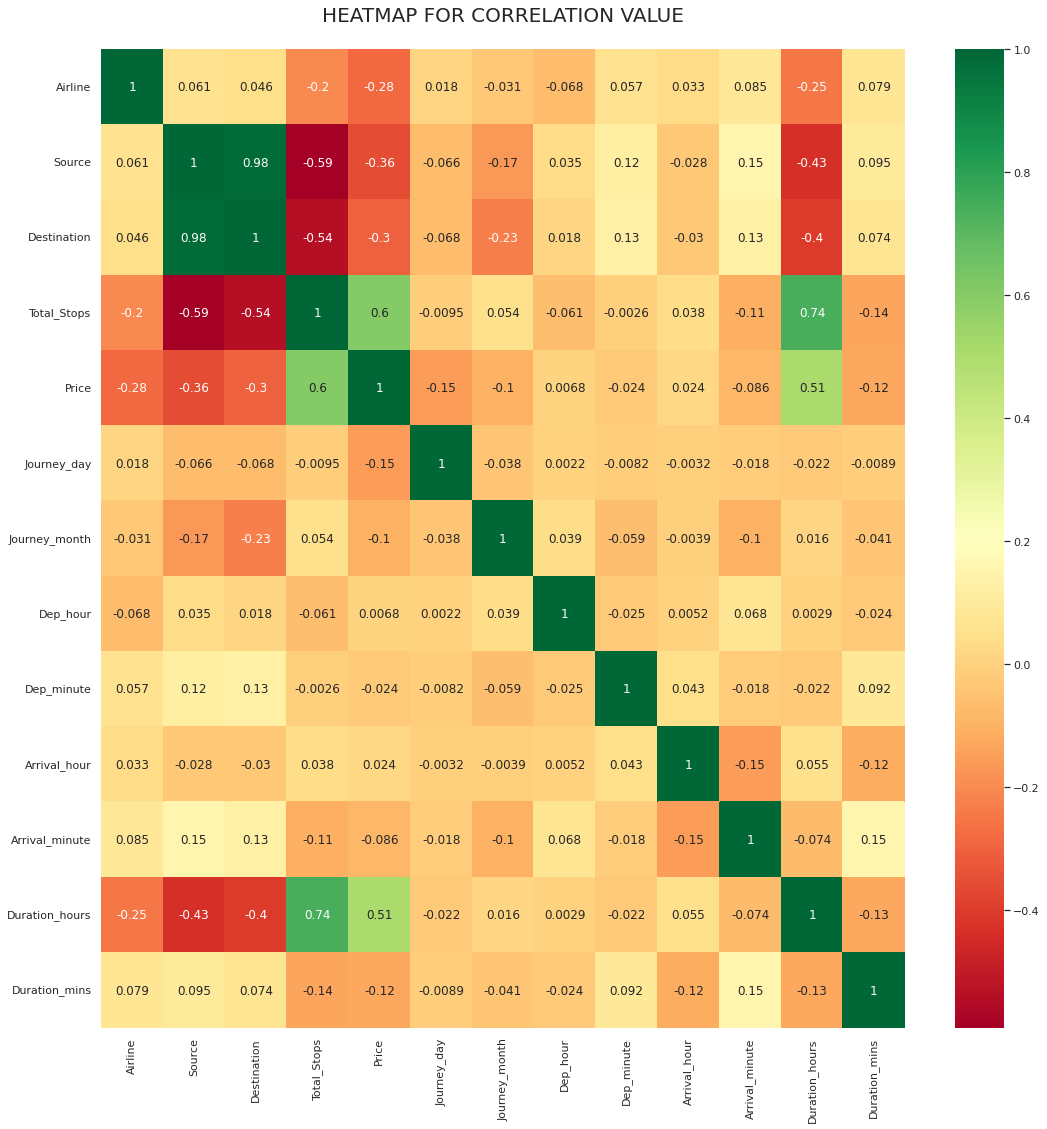

In [ ]:
# Finds correlation between Independent and dependent attributes

correlation = flight_train_data.corr()

plt.figure(figsize = (18,18))
sns.heatmap(correlation, annot = True, cmap = "RdYlGn")
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')

plt.show()

# **Test DataSet**

In [ ]:
# loading the Test dataset to pandas DataFrame
flight_test_data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Flight Price Prediction/Test_set.xlsx")

In [ ]:
type(flight_test_data)

pandas.core.frame.DataFrame

In [ ]:
flight_test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
flight_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [ ]:
flight_test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [ ]:
flight_test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
# converting string date into int number date from Date_of_Journey

flight_test_data["Journey_day"] = pd.to_datetime(flight_test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

flight_test_data["Journey_month"] = pd.to_datetime(flight_test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

# flight_train_data["Journey_year"] = pd.to_datetime(flight_train_data["Date_of_Journey"], format="%d/%m/%Y").dt.year

# Drop Date_of_Journey column
flight_test_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6


In [ ]:
# converting string time into int number time from Dep_Time

flight_test_data["Dep_hour"] = pd.to_datetime(flight_test_data["Dep_Time"]).dt.hour

flight_test_data["Dep_minute"] = pd.to_datetime(flight_test_data["Dep_Time"]).dt.minute

# Drop Dep_Time column
flight_test_data.drop(["Dep_Time"], axis=1, inplace=True)

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30


In [ ]:
# converting string time into int number time from Arrival_Time

flight_test_data["Arrival_hour"] = pd.to_datetime(flight_test_data["Arrival_Time"]).dt.hour

flight_test_data["Arrival_minute"] = pd.to_datetime(flight_test_data["Arrival_Time"]).dt.minute

# Drop Arrival_Time column
flight_test_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [ ]:
flight_train_data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,1,2,3,0,3897,24,3,22,20,1,10,2,50


In [ ]:
# converting string time into int number time from Duration

# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(flight_test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [ ]:
# Adding duration_hours and duration_mins list to train_data dataframe

flight_test_data["Duration_hours"] = duration_hours
flight_test_data["Duration_mins"] = duration_mins

# Drop Duration column
flight_test_data.drop(["Duration"], axis=1, inplace=True)

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

**Airline**

In [ ]:
flight_test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

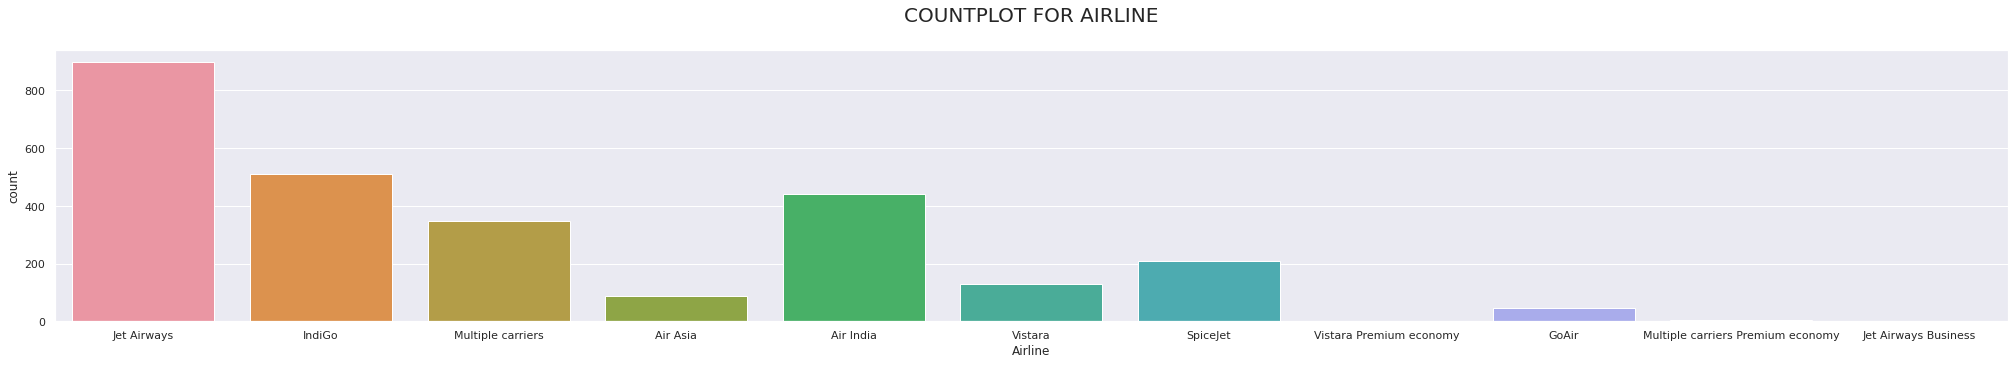

In [ ]:
# Airline Countplot
plt.figure(figsize=(35,5))
sns.countplot(x='Airline', data=flight_test_data)
title = 'CountPlot for Airline\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [ ]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = flight_test_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Number of Airline :", len(flight_test_data["Airline"].unique()))

Number of Airline : 11


In [ ]:
flight_test_data["Airline"].replace({"Jet Airways": 0, "IndiGo": 1, "Air India": 2, "Multiple carriers": 3, "SpiceJet": 4,
                           "Vistara": 5, "Air Asia": 6, "GoAir": 7, "Multiple carriers Premium economy": 8,
                           "Jet Airways Business": 9, "Vistara Premium economy": 10, "Trujet": 11,}, inplace = True)

In [ ]:
flight_test_data["Airline"].value_counts()

0     897
1     511
2     440
3     347
4     208
5     129
6      86
7      46
8       3
10      2
9       2
Name: Airline, dtype: int64

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


**Source**

In [ ]:
flight_test_data["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

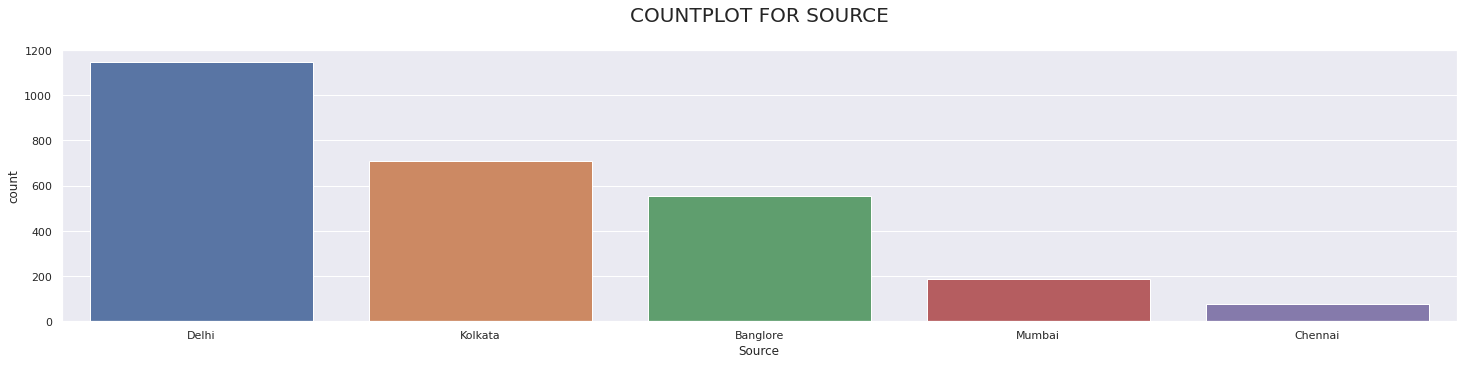

In [ ]:
# Source Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Source', data=flight_test_data)
title = 'CountPlot for Source\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [ ]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = flight_test_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [ ]:
print("Number of Source :", len(flight_test_data["Source"].unique()))

Number of Source : 5


In [ ]:
flight_test_data["Source"].replace({"Delhi": 0, "Kolkata": 1, "Banglore": 2, "Mumbai": 3, "Chennai": 4,}, inplace = True)

In [ ]:
flight_test_data["Source"].value_counts()

0    1145
1     710
2     555
3     186
4      75
Name: Source, dtype: int64

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0,0,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


**Destination**

In [ ]:
flight_test_data["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

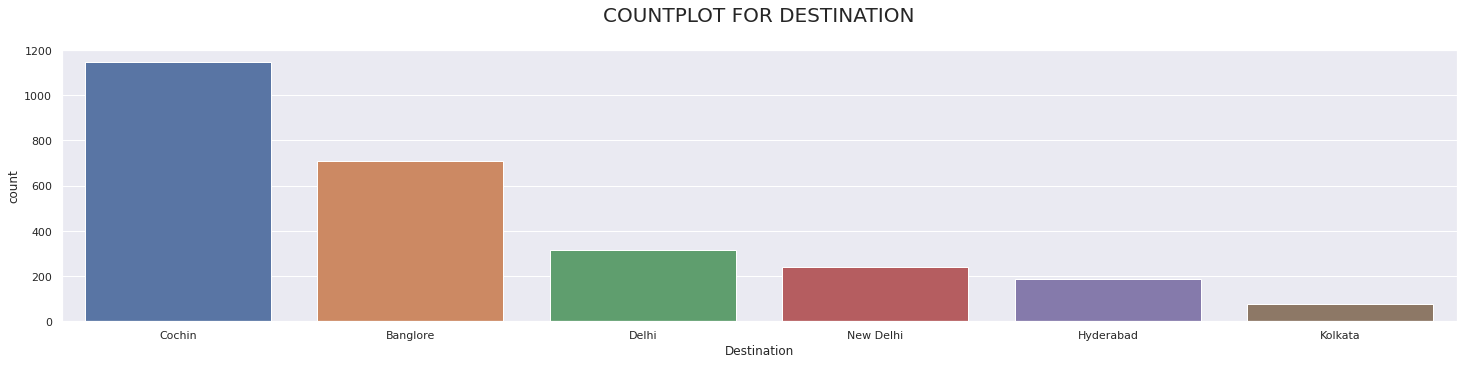

In [ ]:
# Destination Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Destination', data=flight_test_data)
title = 'CountPlot for Destination\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [ ]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = flight_test_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [ ]:
print("Number of Destination :", len(flight_test_data["Destination"].unique()))

Number of Destination : 6


In [ ]:
flight_test_data["Destination"].replace({"Cochin": 0, "Banglore": 1, "Delhi": 2, "New Delhi": 3, "Hyderabad": 4,
                           "Kolkata": 5,}, inplace = True)

In [ ]:
flight_test_data["Destination"].value_counts()

0    1145
1     710
2     317
3     238
4     186
5      75
Name: Destination, dtype: int64

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0,0,0,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55


**Total_Stops**

In [ ]:
flight_test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

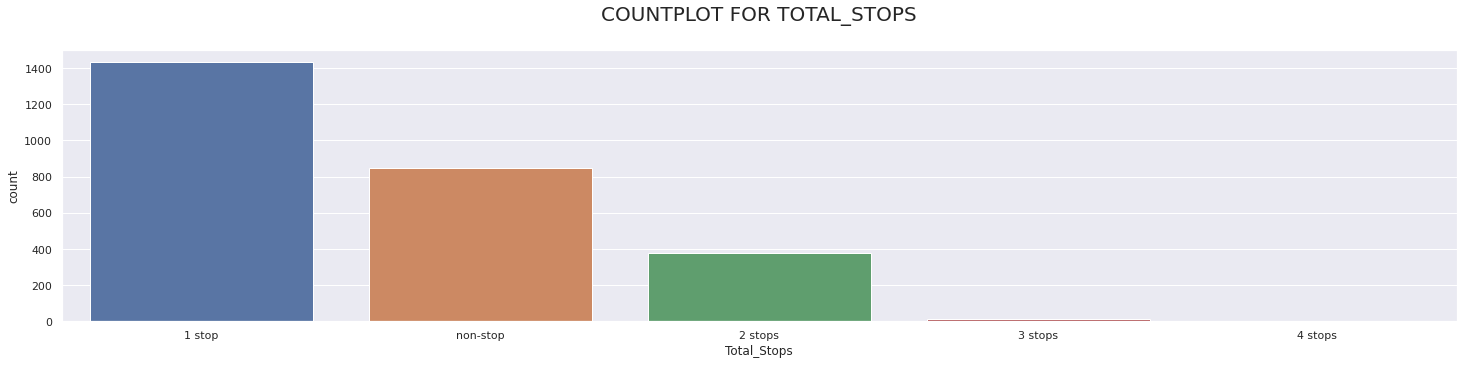

In [ ]:
# Total_Stops Countplot
plt.figure(figsize=(25,5))
sns.countplot(x='Total_Stops', data=flight_test_data)
title = 'CountPlot for Total_Stops\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [ ]:
# As Total_Stops is Nominal Categorical data we will perform OneHotEncoding

Total_Stops = flight_test_data[["Total_Stops"]]

Total_Stops = pd.get_dummies(Total_Stops, drop_first= True)

Total_Stops.head()

,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,1


In [ ]:
print("Number of Total_Stops :", len(flight_test_data["Total_Stops"].unique()))

Number of Total_Stops : 5


In [ ]:
flight_test_data["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,}, inplace = True)

In [ ]:
flight_test_data["Total_Stops"].value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [ ]:
flight_test_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0,0,0,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55


In [ ]:
flight_test_data.drop(["Route" , "Additional_Info"], axis=1, inplace=True )

In [ ]:
flight_test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0,0,0,1,6,6,17,30,4,25,10,55
1,1,1,1,1,12,5,6,20,10,20,4,0
2,0,0,0,1,21,5,19,15,19,0,23,45
3,3,0,0,1,21,5,8,0,21,0,13,0
4,6,2,2,0,24,6,23,55,2,45,2,50


In [ ]:
flight_test_data.shape

(2671, 12)

Splitting Train Data

In [ ]:
X = flight_train_data.drop(['Price'], axis=1)
Y = flight_train_data['Price']

In [ ]:
print(X)

       Airline  Source  Destination  Total_Stops  Journey_day  Journey_month  \
0            1       2            3            0           24              3   
1            2       1            1            2            1              5   
2            0       0            0            2            9              6   
3            1       1            1            1           12              5   
4            1       2            3            1            1              3   
...        ...     ...          ...          ...          ...            ...   
10678        6       1            1            0            9              4   
10679        2       1            1            0           27              4   
10680        0       2            2            0           27              4   
10681        5       2            3            0            1              3   
10682        2       0            0            2            9              5   

       Dep_hour  Dep_minute  Arrival_ho

In [ ]:
print(Y)

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64


In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[0.16737927 0.03429449 0.04102336 0.23468375 0.14716324 0.05912366
 0.02668557 0.02476979 0.03327994 0.02285191 0.18919779 0.01954724]


In [ ]:
#plot graph of feature importances for better visualization

# plt.figure(figsize = (12,8))
# feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

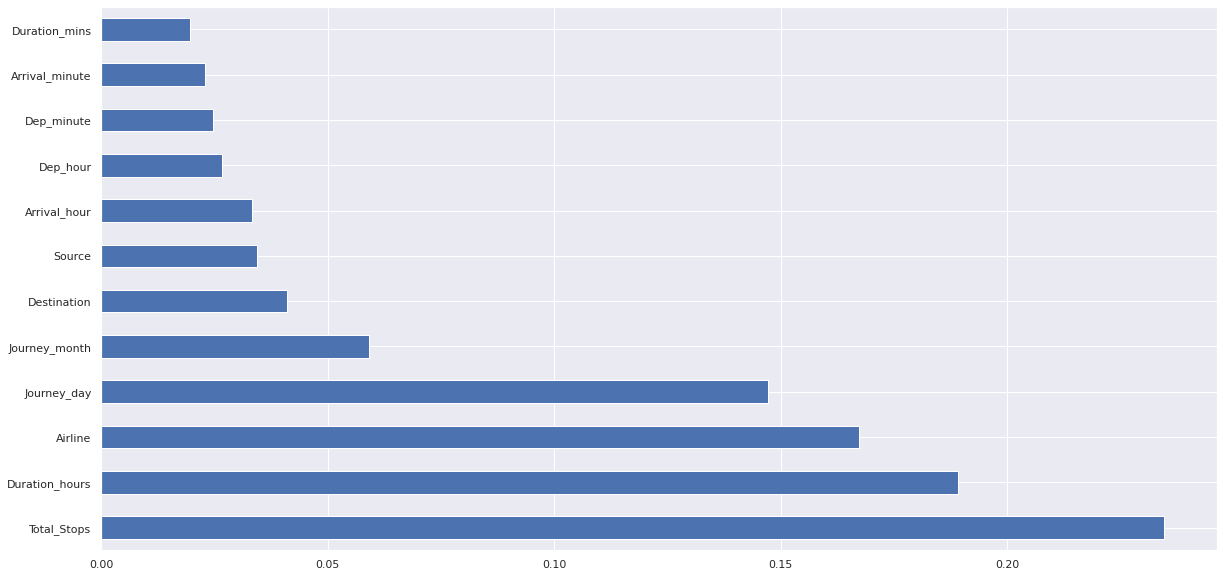

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(20,10))
importences = pd.Series(selection.feature_importances_, index=X.columns)
importences.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Machine Learning

Splitting the data into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(10682, 12) (7477, 12) (3205, 12)


Machine Learning model RandomForestRegrassor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_rg = RandomForestRegressor()
random_rg.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
random_rg_prediction = random_rg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
random_rg.score(X_train, Y_train)

0.955504045748778

In [ ]:
random_rg.score(X_test, Y_test)

0.7976886636501697

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


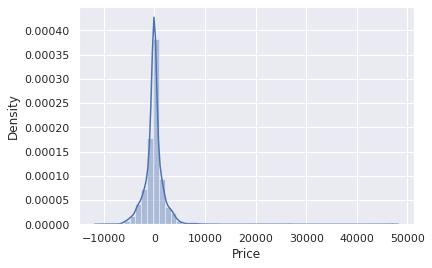

In [ ]:
sns.distplot(Y_test-random_rg_prediction)
plt.show()

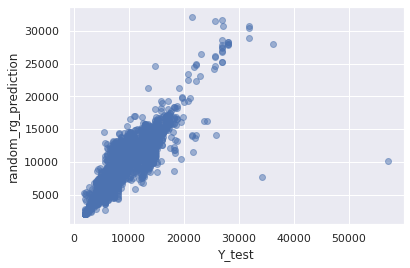

In [ ]:
plt.scatter(Y_test, random_rg_prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("random_rg_prediction")
plt.show()

In [ ]:
from sklearn import metrics

# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_rg_prediction))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_rg_prediction))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_rg_prediction))))

Mean_absolute_error:  1174.0387137691828
Mean_squared_error:  4127338.719037522
Root mean_squared_error:  2031.5852724012157


In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_test, random_rg_prediction))

r2_score:  0.7976886636501697


Machine Learning model RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()
random_clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
random_clf_prediction = random_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy Score :", accuracy_score(Y_test, random_clf_prediction)*100)

Accuracy Score : 33.66614664586584


In [ ]:
random_clf.score(X_train, Y_train)

0.8942089073157684

In [ ]:
random_clf.score(X_test, Y_test)

0.33666146645865835

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


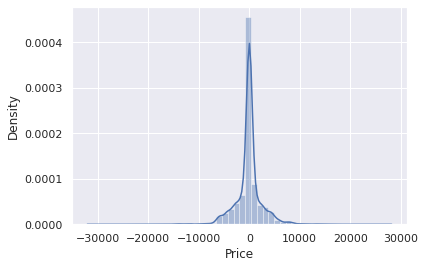

In [ ]:
sns.distplot(Y_test-random_clf_prediction)
plt.show()

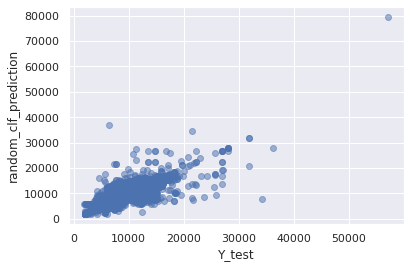

In [ ]:
plt.scatter(Y_test, random_clf_prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("random_clf_prediction")
plt.show()

In [ ]:
from sklearn import metrics

# Mean_absolute_error
print('Mean_absolute_error: ', metrics.mean_absolute_error(Y_test, random_clf_prediction))

# Mean_squared_error
print('Mean_squared_error: ', metrics.mean_squared_error(Y_test, random_clf_prediction))

# Root mean_squared_error
print('Root mean_squared_error: ', (np.sqrt(metrics.mean_squared_error(Y_test, random_clf_prediction))))

Mean_absolute_error:  1477.0555382215289
Mean_squared_error:  7175237.546021841
Root mean_squared_error:  2678.6633879645724


In [ ]:
# r2_score
print('r2_score: ', metrics.r2_score(Y_test, random_clf_prediction))

r2_score:  0.6482886442376433
